In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.cluster import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import cross_val_score

In [2]:
plt.rc('font', family='NanumGothic', size=14)
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

In [3]:
member = pd.read_csv('member_data_preprocessed.csv')
product = pd.read_csv('product_preprocessed.csv')

# 전처리

In [ ]:
drop_list = member.loc[member['조합원상태'] != '정상회원', '회원번호']

In [622]:
member = member.drop(drop_list.index).reset_index(drop=True)

In [623]:
for number in drop_list:
    product = product.loc[product['회원번호'] != number]

In [624]:
product = product.reset_index(drop=True)

In [4]:
X = pd.get_dummies(member.drop(['회원번호', '주소', '연령대', '구', '총구매금액', 'Gold_member', '배송서비스신청여부'], axis=1))

In [5]:
minmax = MinMaxScaler()

In [6]:
feature = minmax.fit_transform(X)

In [7]:
pca = PCA(n_components=0.8, random_state=1004)
pca.fit(feature)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=1004,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca_feature = pca.transform(feature)

## KMeans Clustering

In [9]:
silhouette1 = []
silhouette2 = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=1234, n_jobs=-1)
    score1 = silhouette_score(feature, km.fit_predict(feature), random_state=1004).round(3)
    score2 = silhouette_score(pca_feature, km.fit_predict(pca_feature), random_state=1004).round(3)    
    silhouette1.append(score1)
    silhouette2.append(score2)
    print(f'{k} 군집의 기본 실루엣 계수 : {score1}\t pca 실루엣 계수 : {score2}')

2 군집의 기본 실루엣 계수 : 0.192	 pca 실루엣 계수 : 0.246
3 군집의 기본 실루엣 계수 : 0.26	 pca 실루엣 계수 : 0.326
4 군집의 기본 실루엣 계수 : 0.318	 pca 실루엣 계수 : 0.398
5 군집의 기본 실루엣 계수 : 0.302	 pca 실루엣 계수 : 0.391
6 군집의 기본 실루엣 계수 : 0.3	 pca 실루엣 계수 : 0.403
7 군집의 기본 실루엣 계수 : 0.305	 pca 실루엣 계수 : 0.401
8 군집의 기본 실루엣 계수 : 0.307	 pca 실루엣 계수 : 0.406
9 군집의 기본 실루엣 계수 : 0.318	 pca 실루엣 계수 : 0.422
10 군집의 기본 실루엣 계수 : 0.327	 pca 실루엣 계수 : 0.429


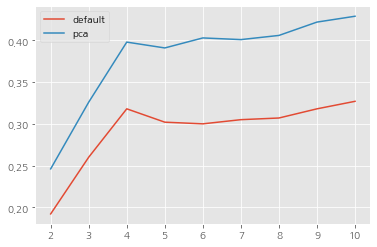

In [10]:
sns.lineplot(x=range(2,11), y=silhouette1, label='default')
sns.lineplot(x=range(2,11), y=silhouette2, label='pca')

## AgglomerativeClustering

In [632]:
silhouette1 = []
silhouette2 = []

for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k)
    score1 = silhouette_score(feature, agg.fit_predict(feature), random_state=1004).round(3)
    score2 = silhouette_score(pca_feature, agg.fit_predict(pca_feature), random_state=1004).round(3)    
    silhouette1.append(score1)
    silhouette2.append(score2)
    print(f'{k} 군집의 기본 실루엣 계수 : {score1}\t pca 실루엣 계수 : {score2}')

2 군집의 기본 실루엣 계수 : 0.145	 pca 실루엣 계수 : 0.194
3 군집의 기본 실루엣 계수 : 0.175	 pca 실루엣 계수 : 0.233
4 군집의 기본 실루엣 계수 : 0.21	 pca 실루엣 계수 : 0.256
5 군집의 기본 실루엣 계수 : 0.246	 pca 실루엣 계수 : 0.296
6 군집의 기본 실루엣 계수 : 0.273	 pca 실루엣 계수 : 0.338
7 군집의 기본 실루엣 계수 : 0.296	 pca 실루엣 계수 : 0.363
8 군집의 기본 실루엣 계수 : 0.279	 pca 실루엣 계수 : 0.38
9 군집의 기본 실루엣 계수 : 0.275	 pca 실루엣 계수 : 0.378
10 군집의 기본 실루엣 계수 : 0.273	 pca 실루엣 계수 : 0.383


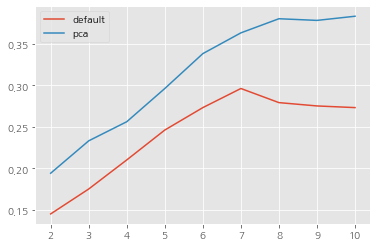

In [633]:
sns.lineplot(x=range(2,11), y=silhouette1, label='default')
sns.lineplot(x=range(2,11), y=silhouette2, label='pca')

# 군집특성 파악

## k군집

In [25]:
km = KMeans(n_clusters=8, n_jobs=-1, random_state=1234)
km.fit(feature)
member['k군집'] = km.labels_

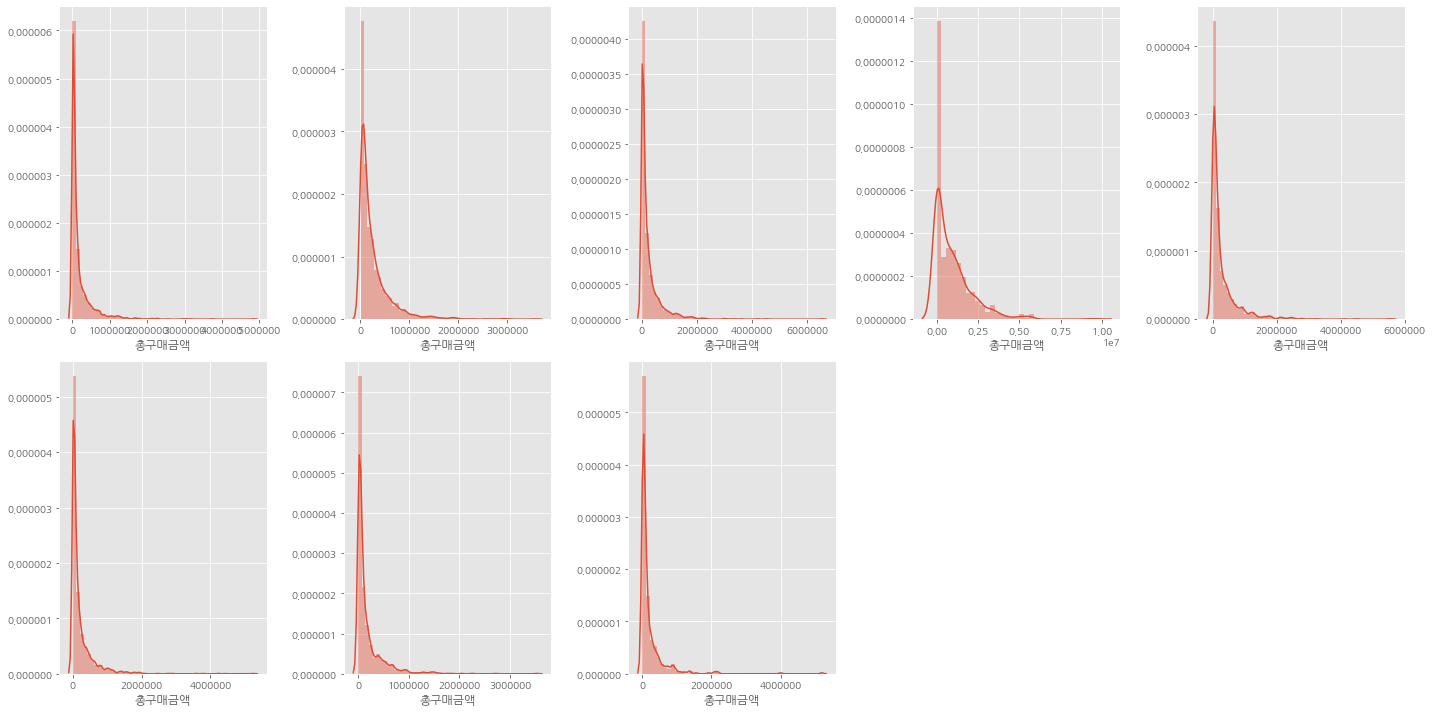

In [26]:
plt.figure(figsize=(20,10))
for i in range(8):
    sns.distplot(member.loc[member['k군집'] == i, '총구매금액'], ax=plt.subplot(2, 5, i+1), label=i)
plt.tight_layout()

## agg군집

In [744]:
agg = AgglomerativeClustering(n_clusters=6)
agg.fit(feature)
member['agg군집'] = agg.labels_

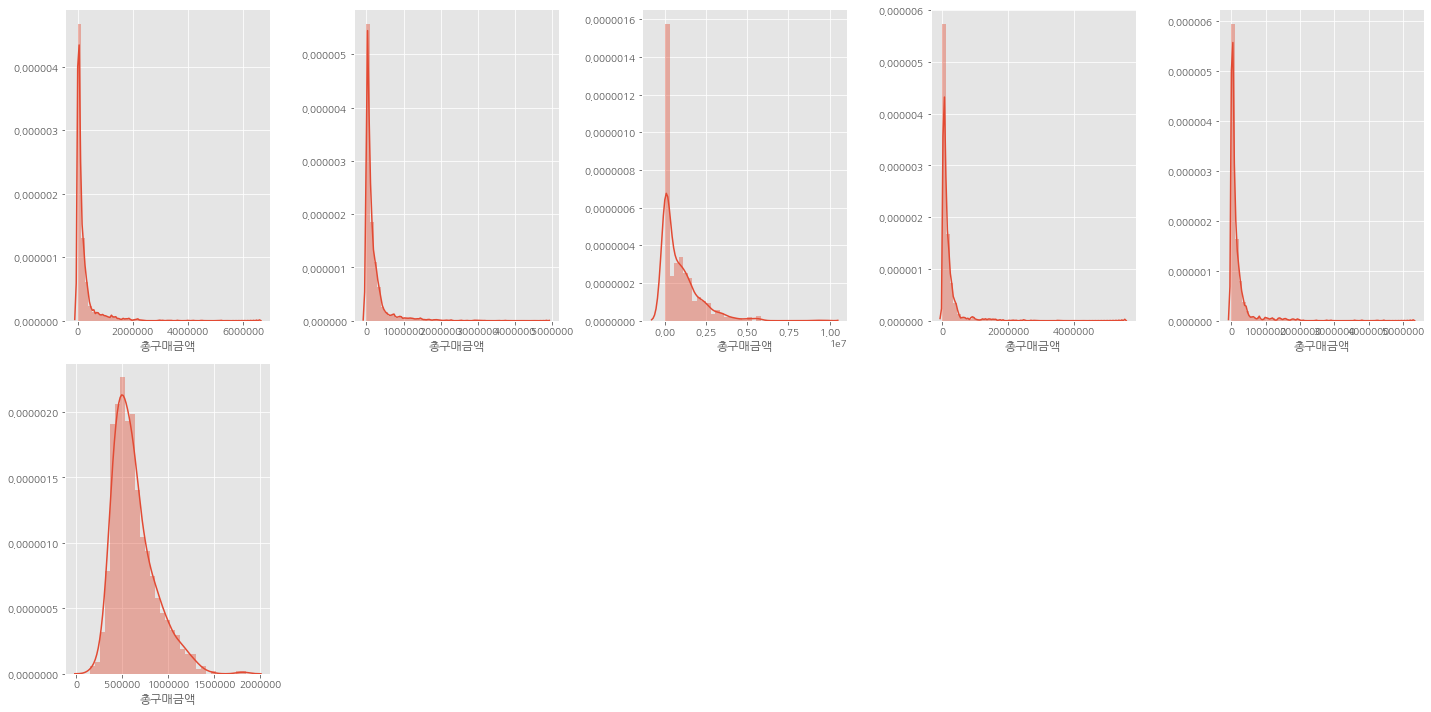

In [745]:
plt.figure(figsize=(20,10))
for i in range(6):
    sns.distplot(member.loc[member['agg군집'] == i, '총구매금액'], ax=plt.subplot(2, 5, i+1), label=i)
plt.tight_layout()

In [670]:
member['k군집'].value_counts()

3    2564
2    2216
4    1948
5    1837
1    1800
0    1036
Name: k군집, dtype: int64

In [671]:
member['agg군집'].value_counts()

1    3389
2    2253
0    2206
3    1684
4     980
5     889
Name: agg군집, dtype: int64

# VIP 분류 모델 생성

## k군집

In [770]:
member['VIP'] = 0

In [771]:
member.loc[member['k군집'] == 6, 'VIP'] = 1

In [799]:
X = pd.get_dummies(member.drop(['Gold_member', 'VIP', 'agg군집', 'k군집', '배송서비스신청여부', '회원번호', '총구매금액', '방문횟수'], axis=1))
y = member['VIP']

In [800]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1234)

In [801]:
dt = DecisionTreeClassifier(random_state=1234, max_depth=4)

In [802]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [803]:
dt.score(x_test, y_test)

0.9555685472084186

In [804]:
cross_val_score(dt, X, y).mean()

0.949477337578932

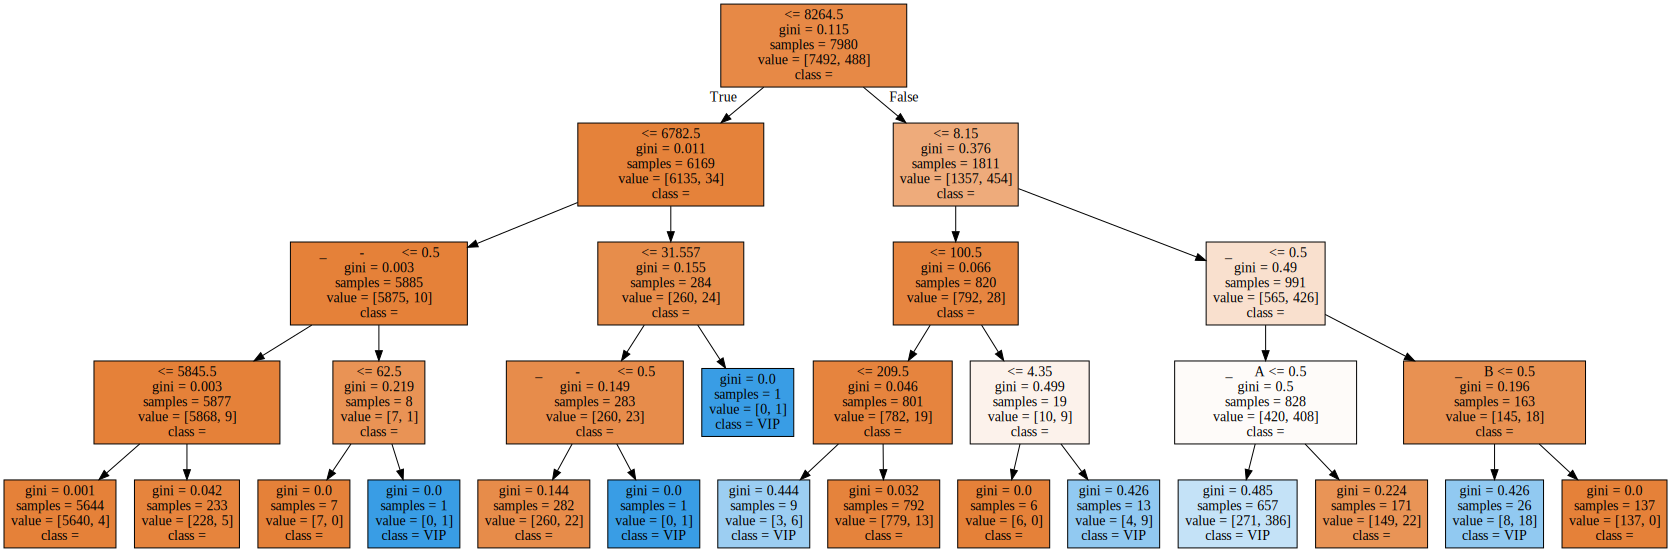

In [805]:
v_feature_name = x_train.columns
export_graphviz(dt, out_file='tree_low.dot', class_names=['일반', 'VIP'], feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_low.dot') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [798]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = dt.feature_importances_

df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
3,주별평균구매금액,0.55
7,방문주기,0.45
0,연령,0.00
134,동_금곡동,0.00
124,구_수지구,0.00
...,...,...
68,주소_수정구-단대동,0.00
69,주소_수정구-복정동,0.00
70,주소_수정구-상대원동,0.00
71,주소_수정구-신흥동,0.00


## agg군집

In [746]:
member['VIP'] = 0

In [747]:
member.loc[member['agg군집'] == 5, 'VIP'] = 1

In [748]:
X = pd.get_dummies(member.drop(['Gold_member', 'VIP', 'agg군집', 'k군집', '배송서비스신청여부', '회원번호'], axis=1))
y = member['VIP']

In [749]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1234)

In [750]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [752]:
dt.score(x_train, y_train)

0.9587719298245614

In [751]:
dt.score(x_test, y_test)

0.9511838643671441

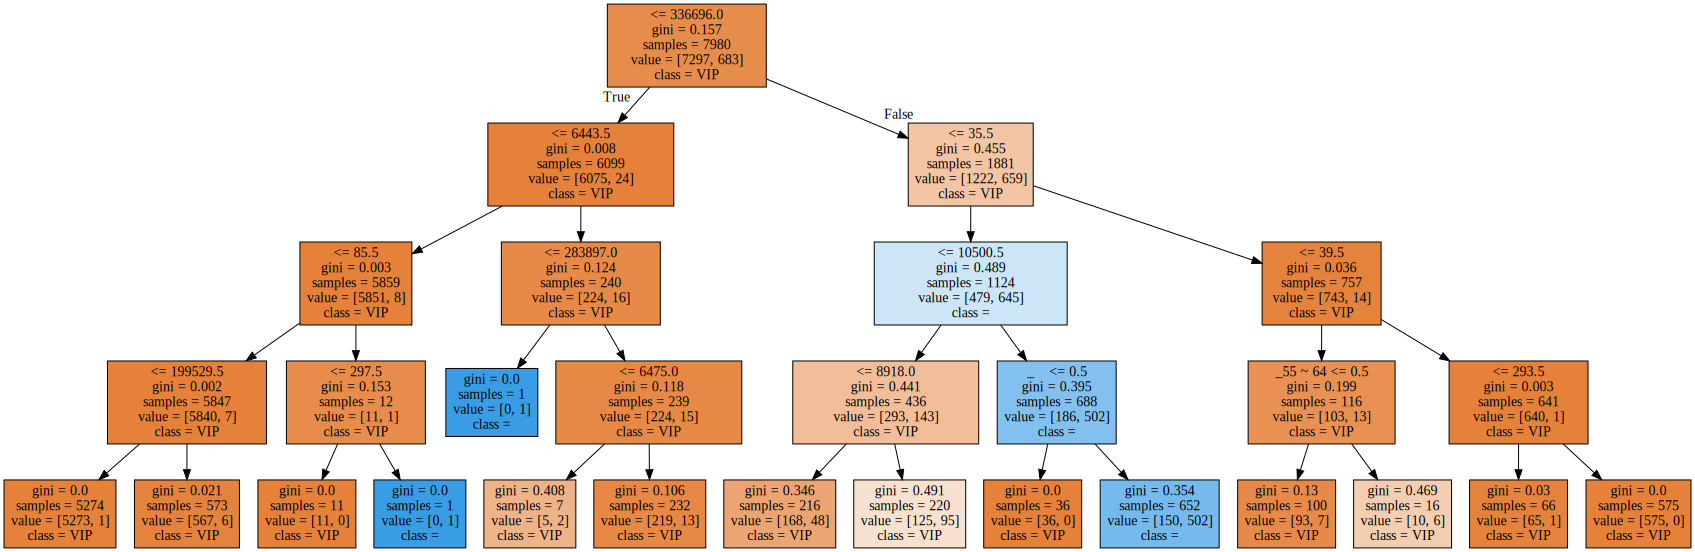

In [753]:
v_feature_name = x_train.columns
export_graphviz(dt, out_file='tree_low.dot', class_names=['VIP', '일반'], feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_low.dot') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))